# Clonal analysis

In [17]:
import cospar as cs

In [18]:
cs.logging.print_version()
cs.settings.verbosity=2 #range: 0 (error),1 (warning),2 (info),3 (hint). 
cs.settings.set_figure_params(format='png',figsize=[4,3.5],dpi=75,fontsize=14,pointsize=3) 

Running cospar 0.1.9 (python 3.8.12) on 2021-12-08 16:42.


In [19]:
# Each dataset should have its folder to avoid conflicts.
cs.settings.data_path='data_cospar' 
cs.settings.figure_path='fig_cospar' 
cs.hf.set_up_folders()

Load an existing dataset. (If you have pre-processed data, you can load it with `cs.hf.read(file_name)`.)

In [20]:
adata_orig=cs.datasets.hematopoiesis_subsampled()

Show barcode heatmap as aggregated into given fate clusters (defined in `adata_orig.obs['state_info']`)

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:>

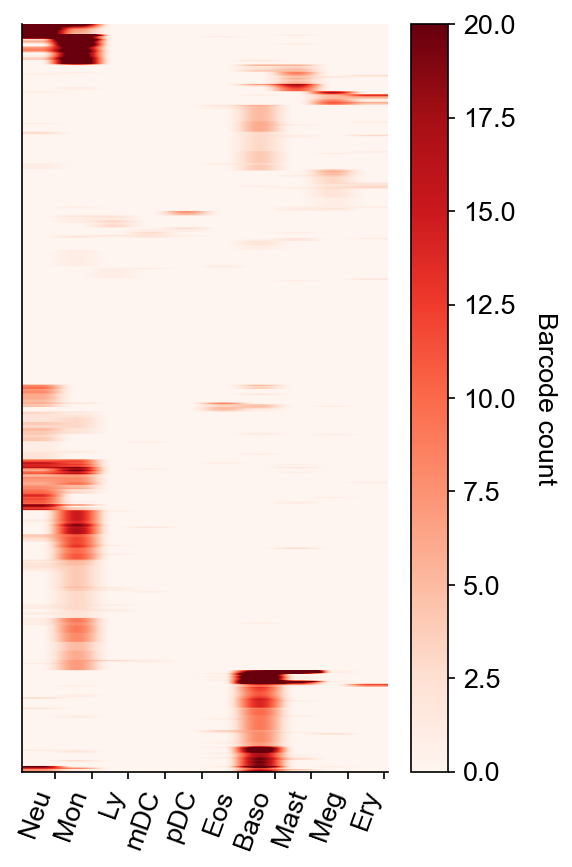

In [21]:
selected_times=None
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.barcode_heatmap(adata_orig,selected_times=selected_times, selected_fates=selected_fates, 
        color_bar=True,rename_fates=celltype_names,log_transform=False)

Fate coupling in the underlying clonal data, defined in our package as the normalized barcode covariance between cells annotated in different fates.

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

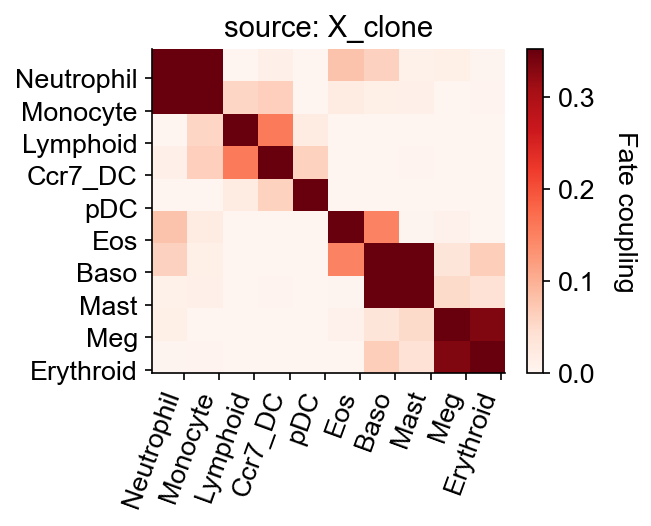

In [22]:
cs.tl.fate_coupling(adata_orig,selected_fates=selected_fates,source='X_clone') # compute the fate coupling
cs.pl.fate_coupling(adata_orig,source='X_clone') # actually plot the coupling

Fate hierarchy constructed from fate coupling of the underlying clonal data, using the neighbor-joining method.

In [23]:
cs.tl.fate_hierarchy(adata_orig,selected_fates=selected_fates,source='X_clone') # compute the fate hierarchy
cs.pl.fate_hierarchy(adata_orig,source='X_clone') # actually plot the hierarchy

Results saved as dictionary at adata.uns['fate_hierarchy_X_clone']

            /-Lymphoid
         /-|
        |   \-Ccr7_DC
      /-|
     |  |   /-Monocyte
     |   \-|
     |      \-Neutrophil
   /-|
  |  |         /-Baso
  |  |      /-|
  |  |   /-|   \-Mast
  |  |  |  |
--|   \-|   \-Eos
  |     |
  |     |   /-Erythroid
  |      \-|
  |         \-Meg
  |
   \-pDC


Next, we compute the clonal fate bias, -log(Q-value). We calculated a P-value that that a clone is enriched (or depleted) in a fate, using Fisher-Exact test (accounting for clone size). The P-value is then corrected to give a Q-value by Benjamini-Hochberg procedure. The alternative hypothesis options are: {'two-sided','greater','less'}. The default is 'two-sided'.
    
    

100%|██████████| 500/500 [00:01<00:00, 402.76it/s]


Data saved at adata.uns['clonal_fate_bias']


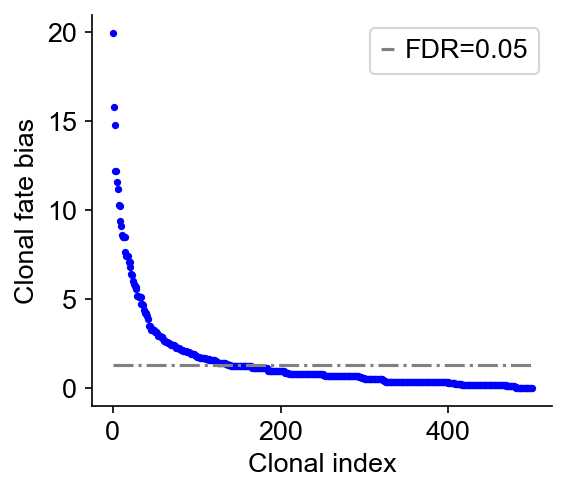

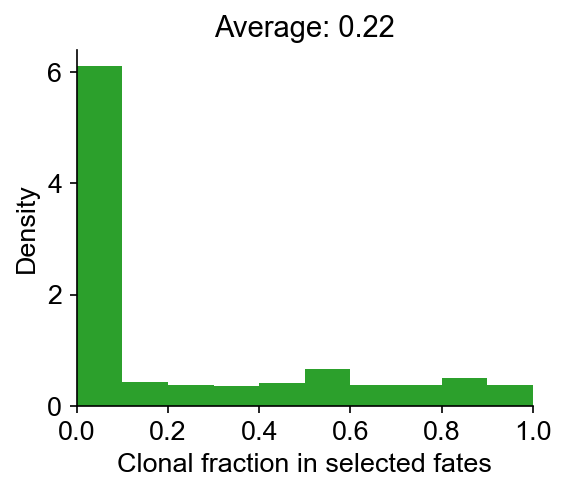

In [24]:
cs.tl.clonal_fate_bias(adata_orig,selected_fate='Monocyte',alternative='two-sided') # compute the fate hierarchy
cs.pl.clonal_fate_bias(adata_orig) # actually plot the hierarchy

In [25]:
result=adata_orig.uns['clonal_fate_bias']
result

,Clone_ID,Clone_size,Q_value,Fate_bias,clonal_fraction_in_target_fate
0,488,58,1.037416e-20,19.984047,0.896552
1,387,37,1.608291e-16,15.793635,0.945946
2,227,45,1.665465e-15,14.778465,0.866667
3,162,42,6.210001e-13,12.206908,0.833333
4,302,112,6.210001e-13,12.206908,0.000000
...,...,...,...,...,...
495,366,9,1.000000e+00,-0.000000,0.222222
496,46,18,1.000000e+00,-0.000000,0.222222
497,408,27,1.000000e+00,-0.000000,0.259259
498,6,4,1.000000e+00,-0.000000,0.250000


Illustrate some most biased clones.

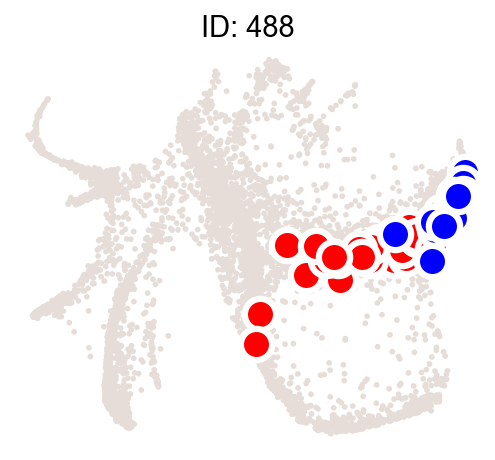

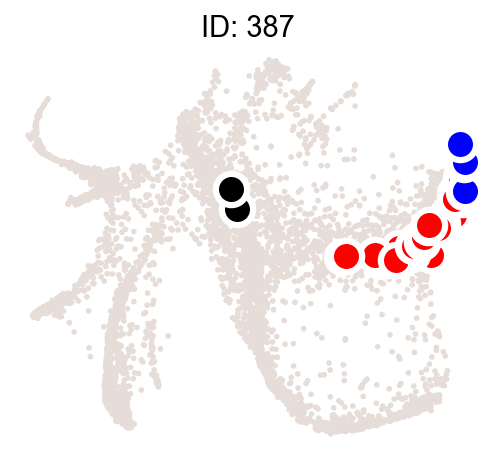

In [26]:
ids=result['Clone_ID'][:2]
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=ids,color_list=['black','red','blue'],clone_point_size=10)